In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
athlete_events_fname = 'athlete_events.csv'
athlete_df = pd.read_csv(athlete_events_fname, index_col=0)

# Zestawienie nr 1

In [3]:
athletes_by_season_df = pd.DataFrame(athlete_df.groupby(['Year', 'Season']).size(), columns=['AthletesCount'])
athletes_by_season_df

AthletesCount
Year Season               
1896 Summer            380
1900 Summer           1936
1904 Summer           1301
1906 Summer           1733
1908 Summer           3101
1912 Summer           4040
1920 Summer           4292
1924 Summer           5233
     Winter            460
1928 Summer           4992
     Winter            582
1932 Summer           2969
     Winter            352
1936 Summer           6506
     Winter            895
1948 Summer           6405
     Winter           1075
1952 Summer           8270
     Winter           1088
1956 Summer           5127
     Winter           1307
1960 Summer           8119
     Winter           1116
1964 Summer           7702
     Winter           1778
1968 Summer           8588
     Winter           1891
1972 Summer          10304
     Winter           1655
1976 Summer           8641
     Winter           1861
1980 Summer           7191
     Winter           1746
1984 Summer           9454
     Winter           2134
1988 Summer          12037
     Winter           2639
1992 Summer          12977
     Winter           3436
1994 Winter           3160
1996 Summer          13780
1998 Winter           3605
2000 Summer          13821
2002 Winter           4109
2004 Summer          13443
2006 Winter           4382
2008 Summer          13602
2010 Winter           4402
2012 Summer          12920
2014 Winter           4891
2016 Summer          13688

# Wykres liniowy

<AxesSubplot:title={'center':'Number of athletes by game'}, xlabel='Year,Season', ylabel='Number of athletes'>

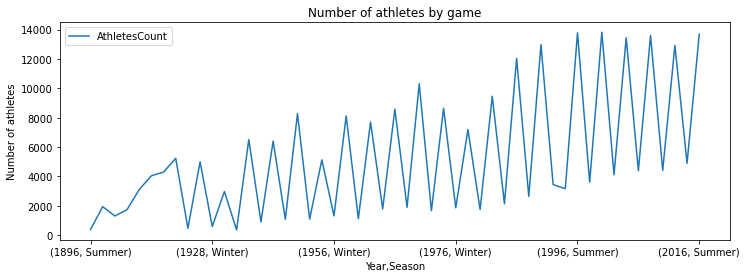

In [4]:
athletes_by_season_df.plot.line(title='Number of athletes by game', figsize=(12,4), fontsize=10, ylabel='Number of athletes')

In [5]:
athletes_by_season_reset_df = athletes_by_season_df.reset_index(level='Season')
athletes_by_season_single_index_df = pd.DataFrame(
    {
        'AthletesCountSummer': athletes_by_season_reset_df[athletes_by_season_reset_df['Season']=='Summer']['AthletesCount'],
        'AthletesCountWinter': athletes_by_season_reset_df[athletes_by_season_reset_df['Season']=='Winter']['AthletesCount']
    },
).fillna(value=0)
athletes_by_season_single_index_df

,AthletesCountSummer,AthletesCountWinter
Year,,
1896,380.0,0.0
1900,1936.0,0.0
1904,1301.0,0.0
1906,1733.0,0.0
1908,3101.0,0.0
1912,4040.0,0.0
1920,4292.0,0.0
1924,5233.0,460.0
1928,4992.0,582.0


# Wykres kolumnowy

<AxesSubplot:title={'center':'Number of athletes by year'}, xlabel='Year', ylabel='Number of athletes'>

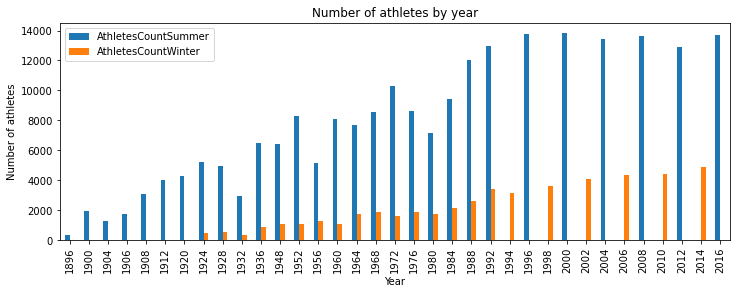

In [6]:
athletes_by_season_single_index_df.plot.bar(title='Number of athletes by year', figsize=(12,4), fontsize=10, ylabel='Number of athletes', xlabel='Year')

# Odpowiedź:

Lepszą prezentację danych stanowi tutaj wykres kolumnowy. Jest czytelniejszy. Możemy z niego łatwiej wyczytać rok oraz sezon igrzysk dla danej kolumny. Ponadto, stosunki liczby zawodników dla różnych igrzysk jest łatwiejszy do ustalenia.

# Zestawienie nr 2

In [7]:
only_summer_games_df = athlete_df[athlete_df['Season'] == 'Summer']
unique_games = only_summer_games_df['Games'].nunique()
avg_sex_by_NOC = pd.DataFrame(
    only_summer_games_df.groupby(['NOC', 'Sex']).size() / unique_games, 
    columns=['AvgAthletesPerGame']
)
avg_sex_by_NOC

AvgAthletesPerGame
NOC Sex                    
AFG F              0.172414
    M              4.172414
AHO F              0.413793
    M              2.137931
ALB F              0.862069
...                     ...
YUG M             60.310345
ZAM F              0.655172
    M              5.655172
ZIM F              3.896552
    M              6.758621

[452 rows x 1 columns]

In [8]:
avg_sex_by_NOC_reset_df = avg_sex_by_NOC.reset_index(level='Sex')
avg_sex_by_NOC_single_index_df = pd.DataFrame(
    {
        'AvgMales': avg_sex_by_NOC_reset_df[avg_sex_by_NOC_reset_df['Sex']=='M']['AvgAthletesPerGame'],
        'AvgFemales': avg_sex_by_NOC_reset_df[avg_sex_by_NOC_reset_df['Sex']=='F']['AvgAthletesPerGame']
    },
).fillna(value=0)
avg_sex_by_NOC_single_index_df

,AvgMales,AvgFemales
NOC,,
AFG,4.172414,0.172414
AHO,2.137931,0.413793
ALB,1.310345,0.862069
ALG,15.482759,3.103448
AND,1.379310,0.448276
...,...,...
YEM,0.965517,0.137931
YMD,0.172414,0.000000
YUG,60.310345,10.241379


# Histogram

array([[<AxesSubplot:title={'center':'AvgMales'}>,
        <AxesSubplot:title={'center':'AvgFemales'}>]], dtype=object)

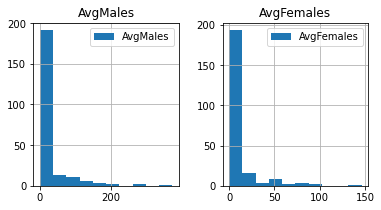

In [9]:
avg_sex_by_NOC_single_index_df.hist(legend=True, figsize=(6, 3))

# Wykres skumulowany

<AxesSubplot:title={'center':'Average males and females by NOC'}, xlabel='NOC'>

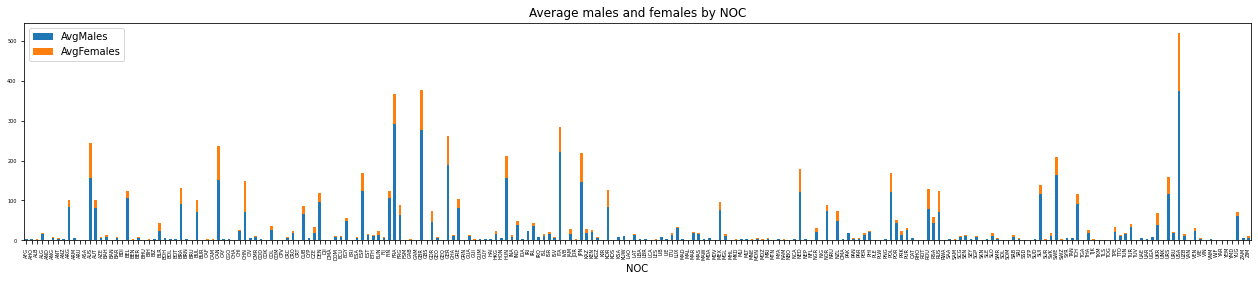

In [10]:
avg_sex_by_NOC_single_index_df.plot.bar(stacked=True, title='Average males and females by NOC', figsize=(22,4), fontsize=5)

# Odpowiedź:

Przez sporą liczbę komitetów wykres skumulowany staje się być nieczytelny. Z histogramu za to można wyczytać i porównać średnią liczbę kobiet i mężczyzn, ale tracimy informacje o komitetach. Wybieramy tym sposobem histogram.

# Zestawienie 5-6

In [11]:
five_biggest_df = pd.DataFrame(athlete_df.groupby(['NOC', 'Games', 'Name']).size().groupby(['NOC']).count().nlargest(5), columns=['AthletesCount'])
five_biggest_df

,AthletesCount
NOC,
USA,12852
GBR,8490
FRA,8276
ITA,7223
GER,6683


# Wykres słupkowy

<AxesSubplot:title={'center':'Top 5 NOC with the greatest number of athletes'}, ylabel='NOC'>

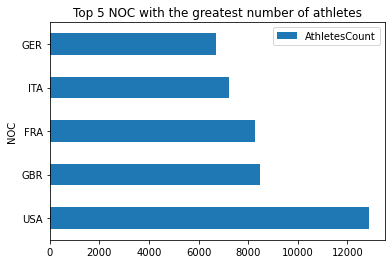

In [12]:
five_biggest_df.plot.barh(title='Top 5 NOC with the greatest number of athletes')

# Wykres kołowy

array([<AxesSubplot:ylabel='AthletesCount'>], dtype=object)

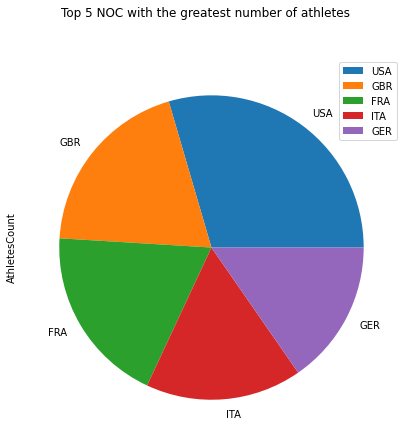

In [13]:
five_biggest_df.plot.pie(subplots=True, figsize=(7, 7), title='Top 5 NOC with the greatest number of athletes')

# Odpowiedź

Lepszą reprezentacją wydaje się tutaj być wykres słupkowy. Mimo że wykres kołowy jest bardziej atrakcyjny dla oka, to trudno jest z niego ustalić kolejność komitetów - poza USA, wszystkie pozostałe wycinki koła wydają się być takie same.